# Основы машинного обучения, ПАДиИИ

## НИУ ВШЭ, 2024-25 учебный год

# Домашнее задание 2. Анализ данных

Задание выполнил(а):

Демьянов Степан

## Общая информация

__Внимание!__  

Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

Каждое задание весит 1 балл. Всего в сумме можно получить, если правильно решить все задания, 20 баллов.

# Домашнее задание 2. Анализ данных

In [1]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm

In [2]:
DIABETS = 'https://raw.githubusercontent.com/evgpat/datasets/main/pima_indians_diabetes.csv'
BABIES = 'https://raw.githubusercontent.com/evgpat/datasets/main/babies_all.txt'

# Часть 1

Будем работать с датасетом Pima Indian Diabetes - это набор данных из Национального института диабета, болезней органов пищеварения и почек. Целью набора данных является диагностическое прогнозирование наличия диабета у пациента. Несколько ограничений были наложены на выбор этих экземпляров из большой базы данных. В частности, все пациенты здесь - женщины в возрасте от 21 года, индийского происхождения.

In [3]:
data = pd.read_csv(DIABETS)
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


Описание данных:

- __Pregnancies__ - данная единица отображает количество беременностей, единицы измерения - целые числа от 0 до N. Тип переменной - количественная, дискретная.
- __Glucose__ - данная единица отображает уровень глюкозы в крови, единицы измерения - целые числа. Тип переменной - количественная, дискретная.
- __BloodPressure__ - данная единица отображает артериальное давление, единицы измерения - миллиметры р/с, целые числа. Тип переменной - количественная, дискретная.
- __SkinThickness__ - данная единица отображает обхват трицепса в миллиметрах, целые числа. Тип переменной - количественная, дискретная.
- __Insulin__ - данная единица отображает уровень инсулина в крови, целые числа. Тип переменной - количественная, дискретная.
- __BMI__ - данная единица отображает индекс массы тела. Тип переменной - количественная, непрерывная.
- __DiabetesPedigreeFunction__ - данная единица отображает риск наследственного диабета в зависимости наличия диабета у родственников. Выражается десятичной дробью от 0 до 1. Тип переменной - количественная, непрерывная.
- __Age__ - данная единица отражает возраст в целых числах. Тип переменной - количественная, дискретная.
- __Class__ - данная единица отражает наличие диабета у субъекта, выражена 0(здоров) или 1(болен). Тип переменной - категориальная, бинарная.

## Задание 1

Как вы видите, в данных много пропусков (NaN). Любым способом посчитайте количество пропусков в каждом из столбцов.

Для тех переменных, в которых есть пропуски, выведите количество пропущенных значений в следующем формате:

**"В переменной {название переменной} {количество} пропущенных значений"**

In [4]:
mis = data.isnull().sum()
for col in mis.index:
    if mis[col] > 0:
        print(f"В переменной {col} {mis[col]} пропущенных значений")

В переменной Glucose 5 пропущенных значений
В переменной BloodPressure 35 пропущенных значений
В переменной SkinThickness 227 пропущенных значений
В переменной Insulin 374 пропущенных значений
В переменной BMI 11 пропущенных значений


## Задание 2

Замените все пропуски дискретных признаков соответствующими медианами, непрерывных признаков - средними значениями.

In [5]:
discrete = ['Pregnancies', 'Glucose', 'BloodPressure',
            'SkinThickness', 'Insulin', 'Age']
continuous = ['BMI', 'DiabetesPedigreeFunction']

for col in discrete:
    data[col] = data[col].fillna(data[col].median())
for col in continuous:
    data[col] = data[col].fillna(data[col].mean())

## Задание 3

Выведите основные статистики (минимум, максимум, среднее, дисперсию, квантили) для всех столбцов.

In [6]:
stats = data.describe().T
stats['variance'] = data.var()
stats[['min', 'max', 'mean', 'variance', '25%', '50%', '75%']]

,min,max,mean,variance,25%,50%,75%
Pregnancies,0.000,17.00,3.845052,11.354056,1.00000,3.0000,6.00000
Glucose,44.000,199.00,121.656250,926.489244,99.75000,117.0000,140.25000
BloodPressure,24.000,122.00,72.386719,146.328741,64.00000,72.0000,80.00000
SkinThickness,7.000,99.00,29.108073,77.285567,25.00000,29.0000,32.00000
Insulin,14.000,846.00,140.671875,7462.033002,121.50000,125.0000,127.25000
BMI,18.200,67.10,32.457464,47.267706,27.50000,32.4000,36.60000
DiabetesPedigreeFunction,0.078,2.42,0.471876,0.109779,0.24375,0.3725,0.62625
Age,21.000,81.00,33.240885,138.303046,24.00000,29.0000,41.00000
Class,0.000,1.00,0.348958,0.227483,0.00000,0.0000,1.00000


## Задание 4

У скольких женщин старше 50 лет обнаружен диабет?

In [7]:
count = data[(data['Age'] > 50) & (data['Class'] == 1)].shape[0]
print(count)

38


## Задание 5

Найдите трех женщин с наибольшими числом беременностей.

In [8]:
top = data.nlargest(3, 'Pregnancies')[['Pregnancies',
                                      'Age', 'Class']]
top

,Pregnancies,Age,Class
159,17,47,1
88,15,43,1
298,14,46,1


## Задание 6

Сколько женщин возраста между 30 и 40 успело родить 3 или более детей?

In [9]:
count = data[(30 <= data['Age']) &
             (40 >= data['Age']) &
             (data['Pregnancies'] >= 3)].shape[0]
print(count)

142


## Задание 7

Нормальным кровяным давлением будем считать давление в диапазоне [80-89]. У какого процента женщин давление нормальное?

In [10]:
normal = ((data['BloodPressure'] >= 80) & (data['BloodPressure'] <= 89)).sum()
per = (normal / data.shape[0]) * 100
print(per)

18.880208333333336


## Задание 8

Считается, что BMI >= 30 - это признак ожирения.
У скольких женщин с признаками ожирения кровяное давление выше среднего?

In [11]:
avg = data['BloodPressure'].mean()
out = data[(data['BMI'] >= 30) &
                (data['BloodPressure'] > avg)].shape[0]
print(out)

251


## Задание 9

Сравните средние значения для признаков __Glucose,	BloodPressure,	Insulin__ среди тех, у кого обнаружен диабет, и тех, у кого его нет.

In [12]:
vs = data.groupby('Class')[['Glucose']].mean()
vs

,Glucose
Class,
0,110.682000
1,142.130597


In [13]:
vs = data.groupby('Class')[['BloodPressure']].mean()
vs

,BloodPressure
Class,
0,70.920000
1,75.123134


In [14]:
vs = data.groupby('Class')[['Insulin']].mean()
vs

,Insulin
Class,
0,127.792000
1,164.701493


## Задание 10

Постройте гистограммы для любых двух количественных признаков.

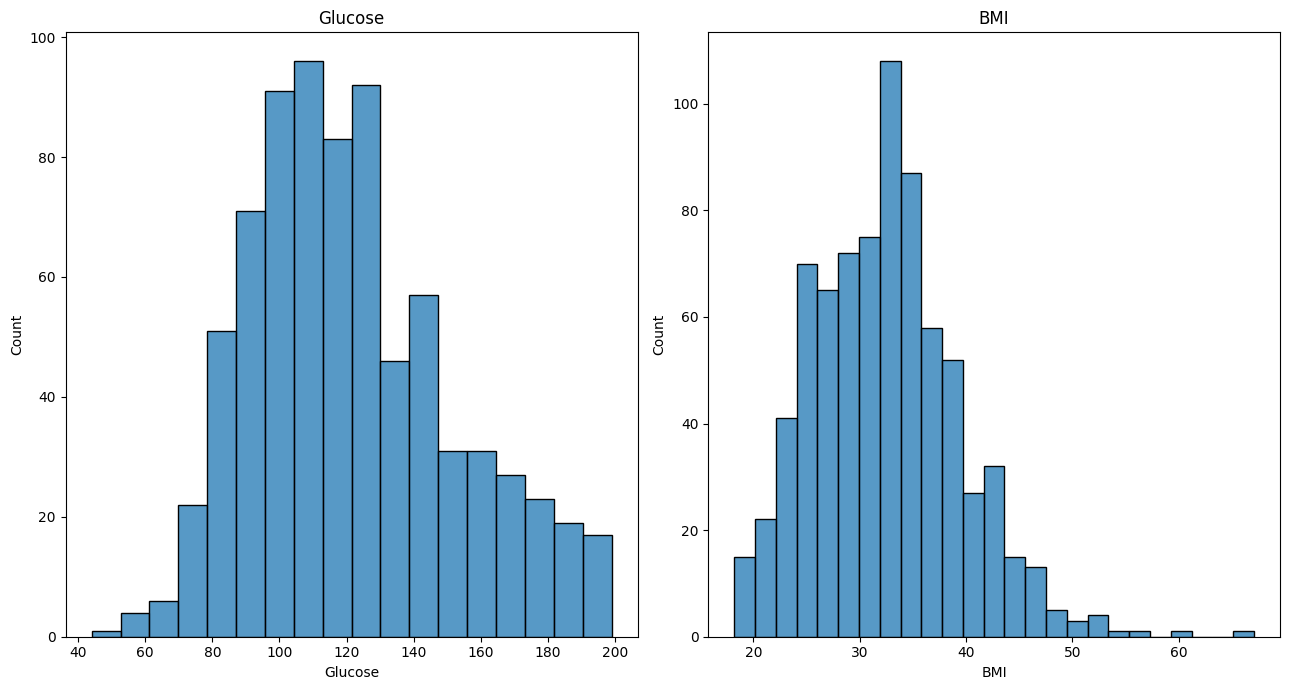

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 7))

plt.subplot(1, 2, 1)
sns.histplot(data['Glucose'])
plt.title('Glucose')

plt.subplot(1, 2, 2)
sns.histplot(data['BMI'])
plt.title('BMI')

plt.tight_layout()
plt.show()

## Задание 11

Постройте круговую диаграмму для признака __Class__.

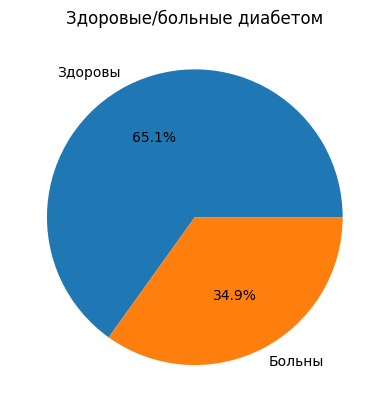

In [16]:
class_counts = data['Class'].value_counts()
plt.pie(class_counts, labels=['Здоровы', 'Больны'], autopct='%1.1f%%')
plt.title('Здоровые/больные диабетом')
plt.show()

## Задание 12

Постройте распределение для признака __BMI__ и сравните его с нормальным (напишите вывод в новой markdown-ячейке под графиками)

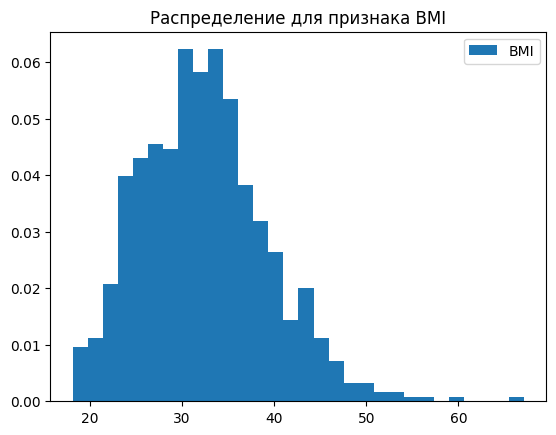

In [17]:
plt.hist(data['BMI'], bins=30, density=True, label='BMI')

plt.title('Распределение для признака BMI')
plt.legend()
plt.show()

Постройте нормальное распределение поверх графика.

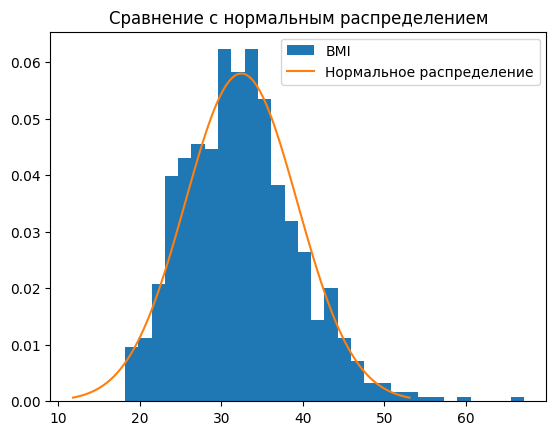

In [18]:
import numpy as np
from scipy.stats import norm as nr
plt.hist(data['BMI'], bins=30, density=True, label='BMI')

mean_value =  data['BMI'].mean()
std = data['BMI'].std()
norm = np.linspace(mean_value - 3 * std, mean_value + 3 * std, 100)
plt.plot(norm, nr.pdf(norm, mean_value, std), label='Нормальное распределение')

plt.title('Сравнение с нормальным распределением')
plt.legend()
plt.show()

Вывод: Распределение BMI имеет положительный смещено вправо, что указывает на наличие выбросов -- ожирение.

## Задание 13

Постройте следующий график: процент больных диабетом в зависимости от числа беременностей.

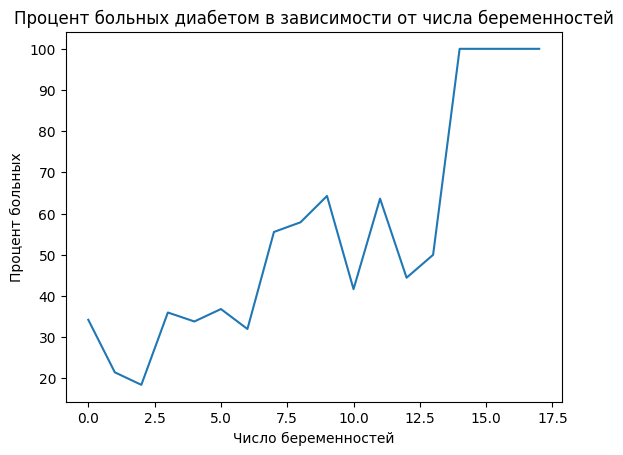

In [19]:
preg_diab = data.groupby('Pregnancies')['Class'].mean() * 100
preg_diab.plot()
plt.title('Процент больных диабетом в зависимости от числа беременностей')
plt.xlabel('Число беременностей')
plt.ylabel('Процент больных')
plt.show()

## Задание 14

Добавьте новый бинарный признак:

__wasPregnant__ $\in$ {0,1} - была женщина беременна (1) или нет (0)

In [20]:
data['wasPregnant'] = (data['Pregnancies'] > 0).astype(int)

## Задание 15

Сравните процент больных диабетом среди женщин, которые были беременны и не были.

In [21]:
preg_diab = data.groupby('wasPregnant')['Class'].mean() * 100
preg_diab

,Class
wasPregnant,
0,34.234234
1,35.007610


## Задание 16

Добавьте новый категориальный признак __bodyType__ на основе столбца BMI:

__BMI Categories:__
    
Underweight = <18.5

Normal weight = 18.5–24.9

Overweight = 25–29.9

Obesity = BMI of 30 or greater

Признак должен принимать значения Underweight, Normal weight, Overweight и Obesity.

In [22]:
data['bodyType'] = np.where(data['BMI'] < 18.5, 'Underweight',
                            np.where(data['BMI'] < 24.9, 'Normal weight',
                            np.where(data['BMI'] < 29.9, 'Overweight',
                                     'Obesity')))

## Задание 17

Будем считать "здоровыми" тех, у кого нормальный вес и кровяное давление. Какой процент "здоровых" женщин больны диабетом?

In [23]:
healthy = data[(data['bodyType'] == 'Normal weight') &
               (data['BloodPressure'] >= 80) &
               (data['BloodPressure'] <= 89)]

per = healthy['Class'].mean() * 100
print(per)

10.0


# Часть 2

In [24]:
babies = pd.read_csv(BABIES, index_col=0)
babies.head(10)

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## Задание 1

Исследуйте набор данных `babies`. Ответьте на вопросы.

1. Какие годы включает датасет

2. Какое имя в датасете находится по индексом 121?

3. Cколько всего родилось детей по имени 'Aaron' за все время?

4. Насколько больше за все время родилось мальчиков чем девочек?

5. Cколько мальчиков родилось в 2010?

6. Сколько в датасете девочек по имени John?

In [25]:
years = babies['year'].unique()
print(years, years.min(), years.max(), len(years))
print("1.", years.min(), "--", years.max())

print("2.", babies.iloc[121]["name"])

print("3.", babies[babies['name'] == 'Aaron']['number'].sum())

W = babies[babies["sex"] == "F"]["number"]
M = babies[babies["sex"] == "M"]["number"]

print("4.", M.sum() - W.sum())

b_2010 = babies[(babies['year'] == 2010) &
            (babies['sex'] == 'M')]['number'].sum()
print("5.", b_2010)

g_john = babies[(babies['name'] == 'John') &
            (babies['sex'] == 'F')]['number'].sum()
print("6.", g_john)


[1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893
 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907
 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921
 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935
 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963
 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977
 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991
 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010] 1880 2010 131
1. 1880 -- 2010
2. Ann
3. 527668
4. 2422447
5. 1898382
6. 21578


## Задание 2

1. Сгруппируйте набор данных babies по году и полу и сохраните результаты в два новых датафрейма: baby_girls и baby_boys.

2. Создайте фигуру matplotlib с 3 графиками один под другим.

3. Постройте линейные графики. Первый график должен показывать тренд рождаемости для девочек, второй - для мальчиков, третий объединять их все вместе (с теми же цветами, что в индивидуальных графиках). Годы - x, количество детей - y.

4. Верхняя и правая границы графиков должны быть невидимы, к каждому графику должен быть заголовок, третий график должен содержать легенду, шкалы графиков должны быть подписаны.

5. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

6. Кратко опишите тренды в ячейке markdown под графиками.

Если при группировке вы сделали год индексом, то можно обратиться к значениям этой переменной через аттрибут `.index`

In [26]:
baby_girls = babies[babies['sex'] == 'F'].groupby('year')['number'].sum()
baby_boys = babies[babies['sex'] == 'M'].groupby('year')['number'].sum()

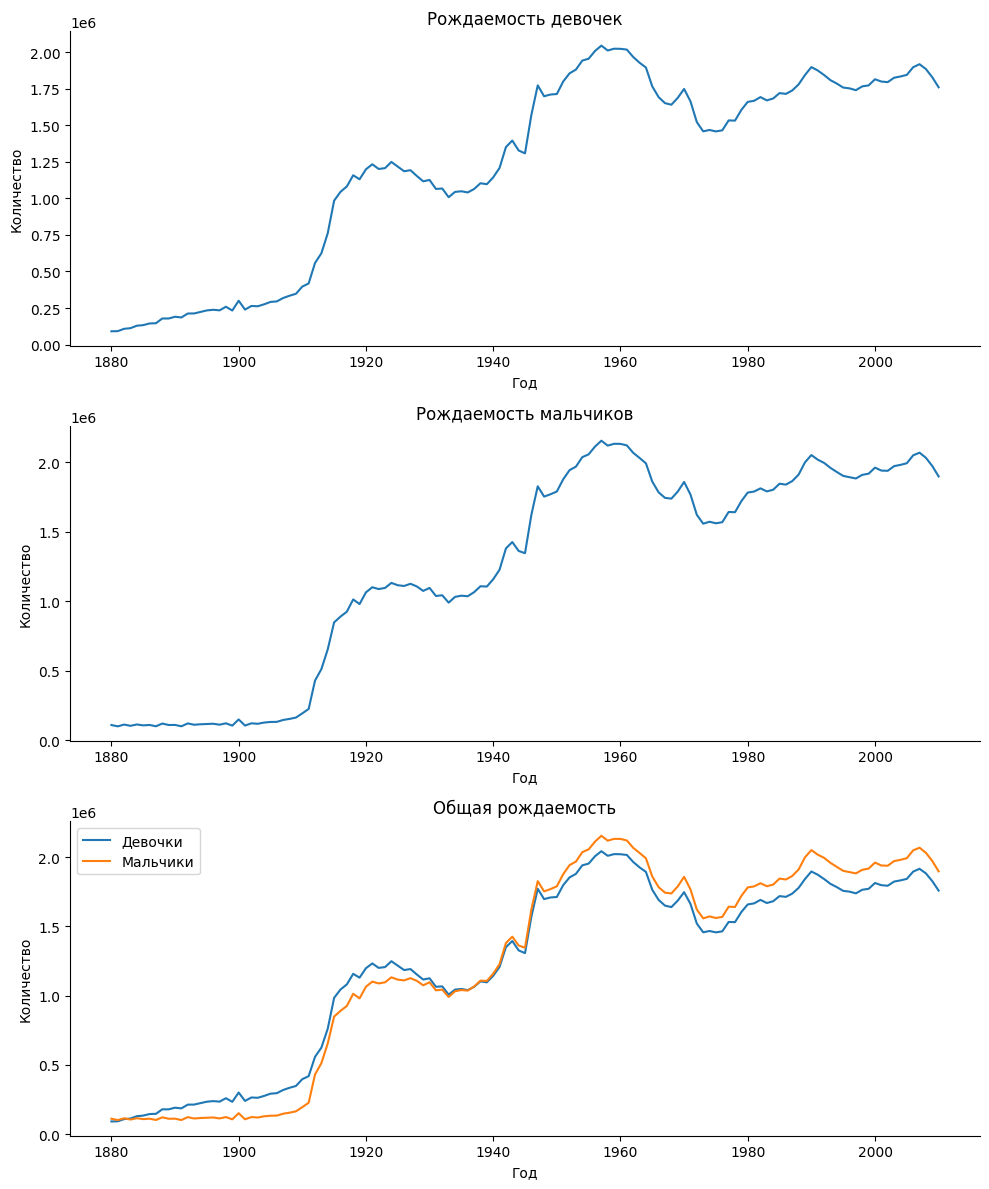

In [27]:
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

axes[0].plot(baby_girls.index, baby_girls.values)
axes[0].set_title('Рождаемость девочек')
axes[0].set_ylabel('Количество')
axes[0].set_xlabel('Год')
axes[0].spines["top"].set_visible(False)
axes[0].spines["right"].set_visible(False)

axes[1].plot(baby_boys.index, baby_boys.values, label='Мальчики')
axes[1].set_title('Рождаемость мальчиков')
axes[1].set_ylabel('Количество')
axes[1].set_xlabel('Год')
axes[1].spines["top"].set_visible(False)
axes[1].spines["right"].set_visible(False)

axes[2].plot(baby_girls.index, baby_girls.values, label='Девочки')
axes[2].plot(baby_boys.index, baby_boys.values, label='Мальчики')
axes[2].set_title('Общая рождаемость')
axes[2].set_ylabel('Количество')
axes[2].set_xlabel('Год')
axes[2].spines["top"].set_visible(False)
axes[2].spines["right"].set_visible(False)
axes[2].legend()

plt.tight_layout()
plt.show()

## Задание 3

1. Сгруппируйте нужным способом датафрейм babies и найдите 4 самых популярных имени за всю историю (2 женских и 2 мужских).

2. Для каждого найденного имени создайте новый датафрейм вида babies_alisa и сохраните в него данные, сколько детей с таким именем рождалось каждый год.

3. Создайте фигуру matplotlib с 4 горизонтальными графиками один под другим.

4. Постройте 4 линейных графика - тренд для каждого имени за все время.

5. Каждый график должен содержать легенду, один общий заголовок, шкалы графиков должны быть подписаны.

6. Для шкалы количество должны быть установлены лимиты, чтобы она была одинакова на обоих графиках.

7. Опишите тренды в ячейке markdown под графиками.

In [28]:
top_names = (
    babies.groupby(["sex", "name"])["number"]
    .sum()
    .groupby("sex", group_keys=False)
    .nlargest(2)
    .reset_index()
)

top_names

,sex,name,number
0,F,Mary,4103935
1,F,Patricia,1568742
2,M,James,5049727
3,M,John,5040319


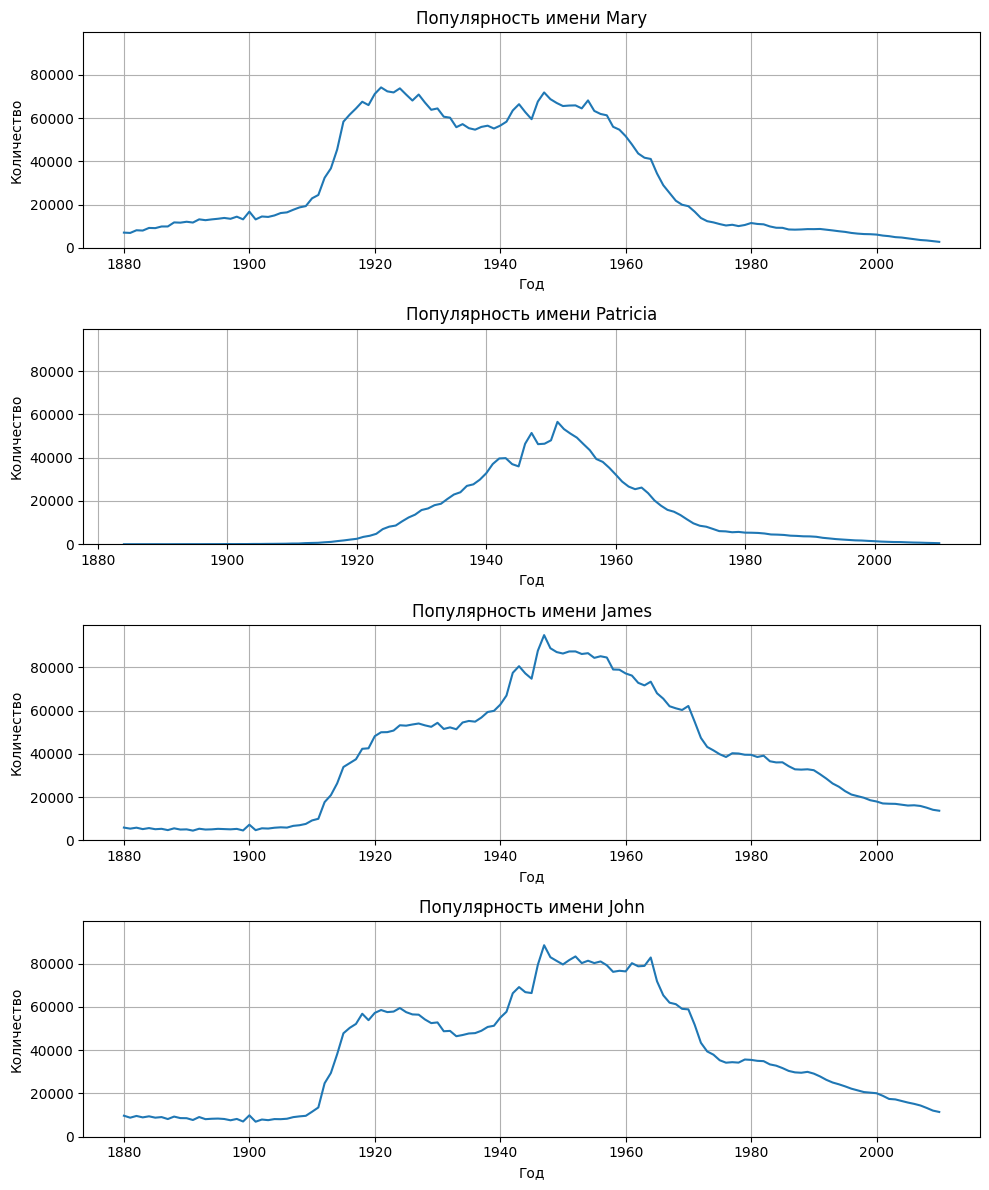

In [29]:
fig, axes = plt.subplots(4, 1, figsize=(10, 12))

mary_data = (babies[babies['name'] == 'Mary']
             .groupby("year")["number"]
             .sum()
             .reset_index())
patricia_data = (babies[babies['name'] == 'Patricia']
                 .groupby("year")["number"]
                 .sum()
                 .reset_index())
james_data = (babies[babies['name'] == 'James']
                 .groupby("year")["number"]
                 .sum()
                 .reset_index())

john_data = (babies[babies['name'] == 'John']
                 .groupby("year")["number"]
                 .sum()
                 .reset_index())
lim = max(max(mary_data["number"]),
          max(patricia_data["number"]),
          max(james_data["number"]),
          max(john_data["number"]))*1.05

axes[0].plot(mary_data['year'], mary_data['number'])
axes[0].set_title('Популярность имени Mary')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество')
axes[0].set_ylim(0, lim)
axes[0].grid(True)


axes[1].plot(patricia_data['year'], patricia_data['number'])
axes[1].set_title('Популярность имени Patricia')
axes[1].set_xlabel('Год')
axes[1].set_ylabel('Количество')
axes[1].set_ylim(0, lim)
axes[1].grid(True)


axes[2].plot(james_data['year'], james_data['number'])
axes[2].set_title('Популярность имени James')
axes[2].set_xlabel('Год')
axes[2].set_ylabel('Количество')
axes[2].set_ylim(0, lim)
axes[2].grid(True)


axes[3].plot(john_data['year'], john_data['number'])
axes[3].set_title('Популярность имени John')
axes[3].set_xlabel('Год')
axes[3].set_ylabel('Количество')
axes[3].set_ylim(0, lim)
axes[3].grid(True)

plt.tight_layout()
plt.show()